# Load libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from scipy.sparse import csr_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [2]:
import os
vis_path = "SB22_GroupAssessedPractical2025/figures"

if not os.path.exists(vis_path):
    # if the folder directory is not exist then create it.
    os.makedirs(vis_path)

In [3]:
# Load the datasets
# Load the training data and the public test set for the fps feature representation
path = 'SB22_GroupAssessedPractical2025/'

X_fps_train = pd.read_csv(f'{path}X_fps_train.csv', index_col = 0) # inputs of the training set
y_train = pd.read_csv(f'{path}y_train.csv', index_col = 0) # outputs of the training set

X_fps_public_test = pd.read_csv(f'{path}X_fps_public_test.csv', index_col = 0) # inputs of the public test set
y_public_test = pd.read_csv(f'{path}y_public_test.csv', index_col = 0) # outputs of the public test set

X_fps_private_test = pd.read_csv(f'{path}X_fps_private_test.csv', index_col = 0) # inputs of the private test set

## Glimpse the fps train and test datasets

In [4]:
# X_fps_train is a 975 * 1024 dataframe. 
# Entries (i,j) correspond to the j'th dimension of the observation i
print(X_fps_train.shape)
X_fps_train.head()

(975, 1024)


,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [5]:
# y_train contains the response of the regression
print(y_train.shape)
y_train.head()

(975, 1)


,0
0,9.1814
1,8.2179
2,8.8199
3,7.8203
4,8.7660


In [6]:
# X_fps_public_test is the array of public test inputs for the fps featurisation, of the same format as X_train. 
# The objective is to predict the output
print(X_fps_public_test.shape)
X_fps_public_test.head()

(109, 1024)


,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
print(y_public_test.shape)
y_public_test.head()

(109, 1)


,0
0,8.5876
1,8.4598
2,7.8605
3,7.3684
4,9.1975


In [8]:
print(X_fps_private_test.shape)
X_fps_private_test.head()

(73, 1024)


,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Glimpse the embed train and test datasets

In [9]:
# The training data and the public test set for the embed representation - note the labels are the same
X_embed_train = pd.read_csv(f'{path}X_embed_train.csv', index_col = 0) # inputs of the training set
X_embed_public_test = pd.read_csv(f'{path}X_embed_public_test.csv', index_col = 0) # inputs of the public test set
X_embed_private_test = pd.read_csv(f'{path}X_embed_private_test.csv', index_col = 0) # inputs of the private test set

In [10]:
# X_embed_train is a 975 * 224 dataframe. 
# Entries (i,j) correspond to the j'th dimension of the observation i
print(X_embed_train.shape)
X_embed_train.head()

(975, 224)


,0,1,2,3,4,5,6,7,8,9,...,214,215,216,217,218,219,220,221,222,223
0,0.187180,0.0,0.003742,0.196630,1.507955e-08,0.0,0.0,0.078273,0.002723,0.166424,...,0.310832,0.000000,4.432339,0.397316,1.255736,2.567172,2.585761,4.036905,1.553301,0.509254
1,0.151870,0.0,0.003540,0.265427,1.224522e-08,0.0,0.0,0.053282,0.002714,0.163829,...,1.149392,0.207148,3.972186,0.405913,0.928334,1.443732,1.522634,2.840873,1.173982,0.159537
2,0.135740,0.0,0.002932,0.234039,1.658822e-08,0.0,0.0,0.076584,0.002727,0.157557,...,0.797707,0.000000,4.703412,0.487977,0.890296,2.270626,2.155244,3.774419,0.881434,0.478385
3,0.147441,0.0,0.004043,0.259974,1.226497e-08,0.0,0.0,0.049902,0.002628,0.164079,...,1.040155,0.000000,4.092764,0.427793,0.888401,1.507603,1.459289,3.099282,0.975932,0.171279
4,0.136828,0.0,0.003005,0.251722,1.700786e-08,0.0,0.0,0.086254,0.002447,0.154827,...,0.719317,0.000000,4.751108,0.563709,1.101283,2.448888,2.190843,3.823117,1.340178,0.244902


In [11]:
print(X_embed_public_test.shape)
X_embed_public_test.head()

(109, 224)


,0,1,2,3,4,5,6,7,8,9,...,214,215,216,217,218,219,220,221,222,223
0,0.181311,0.0,0.002685,0.201899,1.796001e-08,0.0,0.0,0.050072,0.002794,0.169587,...,1.196194,0.0,4.320353,0.701186,0.974112,2.032085,2.169112,3.550757,0.987376,0.174321
1,0.168722,0.0,0.003579,0.158179,9.667589e-09,0.0,0.0,0.046213,0.003241,0.159781,...,0.682885,0.0,4.002531,0.559166,1.029442,2.048392,2.056693,3.469629,1.373149,0.329060
2,0.167195,0.0,0.004964,0.242998,1.676488e-08,0.0,0.0,0.071019,0.003481,0.189179,...,0.956737,0.0,3.620539,0.688879,0.956561,2.003325,1.883343,3.204569,1.166992,0.555451
3,0.153374,0.0,0.003554,0.269136,1.231090e-08,0.0,0.0,0.062681,0.002606,0.161757,...,1.020801,0.0,4.129386,0.732771,0.975275,2.026931,1.960163,3.392915,1.292960,0.326591
4,0.158042,0.0,0.002530,0.214605,1.674350e-08,0.0,0.0,0.040279,0.002888,0.170881,...,1.401618,0.0,4.536066,0.758647,0.942460,2.288053,2.135196,3.751605,1.303981,0.159817


In [12]:
print(X_embed_private_test.shape)
X_embed_private_test.head()

(73, 224)


,0,1,2,3,4,5,6,7,8,9,...,214,215,216,217,218,219,220,221,222,223
0,0.143887,0.0,0.004961,0.211722,1.592448e-08,0.0,0.0,0.047931,0.002992,0.168364,...,0.947948,0.0,4.462779,0.603744,0.918264,2.161382,2.033910,3.623223,1.058784,0.389836
1,0.152573,0.0,0.002698,0.196220,1.421707e-08,0.0,0.0,0.042035,0.002927,0.167804,...,1.064980,0.0,4.202060,0.806546,0.880287,2.126608,1.988180,3.365509,1.211453,0.271263
2,0.164470,0.0,0.004707,0.227267,2.120291e-08,0.0,0.0,0.037708,0.003293,0.155841,...,1.166241,0.0,4.216923,0.941371,0.875050,2.111993,2.127699,3.584548,0.963736,0.271828
3,0.160639,0.0,0.002576,0.235371,1.793957e-08,0.0,0.0,0.048452,0.002546,0.156316,...,1.218550,0.0,4.847516,0.742728,0.962619,2.358298,2.235353,3.878817,1.150218,0.226753
4,0.153188,0.0,0.003259,0.241148,1.672528e-08,0.0,0.0,0.045108,0.002276,0.152704,...,0.643924,0.0,4.341595,0.849505,1.004697,2.356451,2.350025,3.698866,1.352040,0.170400


## Check missingness

In [13]:
# This function check if there is NA values in each column and then check if there is 
# NA values in the whole datasets
print(X_fps_train.isna().any().any()) 
print(X_fps_public_test.isna().any().any()) 
print(X_fps_private_test.isna().any().any()) 
print(X_embed_train.isna().any().any()) 
print(X_embed_public_test.isna().any().any()) 
print(X_embed_private_test.isna().any().any()) 
print(y_train.isna().any().any()) 
print(y_public_test.isna().any().any()) 
# Therefore, there is no NA values contain in any datasets 

False
False
False
False
False
False
False
False


# 1. Characteristics of Predictors and Response

## 1.1 predictors

### Sparsity of Fps data

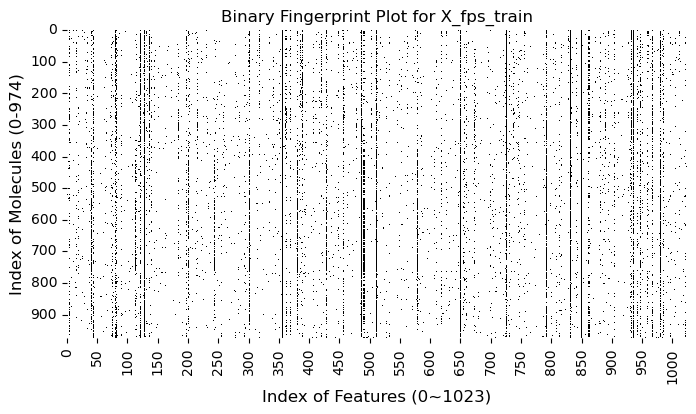

In [14]:
# Binary Fingerprint Plot for X_fps_train
sparse_data_train = csr_matrix(X_fps_train)

plt.figure(figsize=(8,4))
sns.heatmap(sparse_data_train.toarray(), cmap="binary", cbar=False)
plt.title("Binary Fingerprint Plot for X_fps_train", fontsize=12)

# Set x-ticks and y-ticks intervals
plt.xticks(np.arange(0, sparse_data_train.shape[1], 50), labels=np.arange(0, sparse_data_train.shape[1], 50), fontsize=10)
plt.yticks(np.arange(0, sparse_data_train.shape[0], 100), labels=np.arange(0, sparse_data_train.shape[0], 100), fontsize=10)

plt.xlabel('Index of Features (0~1023)', fontsize=12)
plt.ylabel('Index of Molecules (0-974)', fontsize=12)

# plt.savefig(f'{vis_path}/EDA_Figure_2a', bbox_inches = 'tight',dpi=1000)
plt.show()

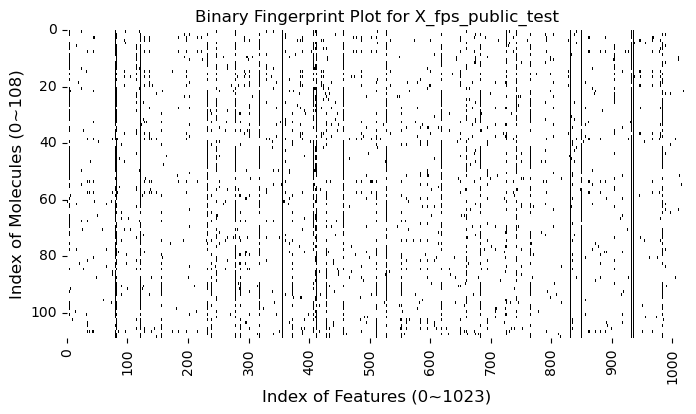

In [15]:
# Binary Fingerprint Plot for X_fps_public_test
sparse_data_test = csr_matrix(X_fps_public_test)

plt.figure(figsize=(8,4))
sns.heatmap(sparse_data_test.toarray(),cmap="binary",cbar=False)
plt.title("Binary Fingerprint Plot for X_fps_public_test",fontsize=12)
plt.xticks(np.arange(0, sparse_data_test.shape[1], 100), labels=np.arange(0, sparse_data_test.shape[1], 100), fontsize=10)
plt.yticks(np.arange(0, sparse_data_test.shape[0], 20), labels=np.arange(0, sparse_data_test.shape[0], 20), fontsize=10)
plt.xlabel('Index of Features (0~1023)',fontsize=12)
plt.ylabel('Index of Molecules (0~108)',fontsize=12)

# plt.savefig(f'{vis_path}/EDA_Figure_2b', bbox_inches = 'tight',dpi=1000)
plt.show()

### Different feature scales in Embed data

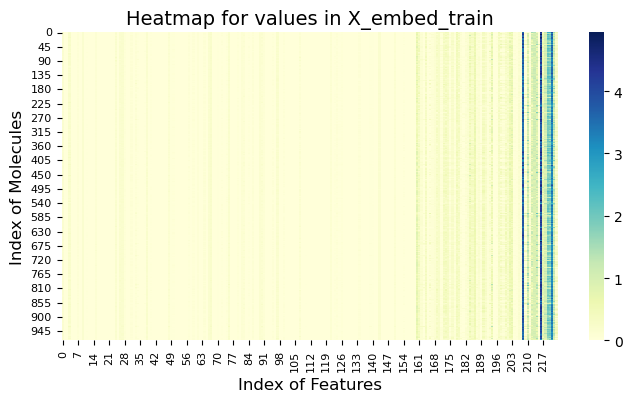

In [16]:
plt.figure(figsize=(8,4))
ax = sns.heatmap(X_embed_train, cmap="YlGnBu", cbar=True)

ax.set_title("Heatmap for values in X_embed_train", fontsize=14)

ax.set_xlabel("Index of Features", fontsize=12)
ax.set_ylabel("Index of Molecules", fontsize=12)

ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
# plt.savefig(vis_path + 'Figure_4.png', dpi=300, bbox_inches='tight')

plt.show()

### Correlations between features in Embed data

(224, 224)


<Axes: >

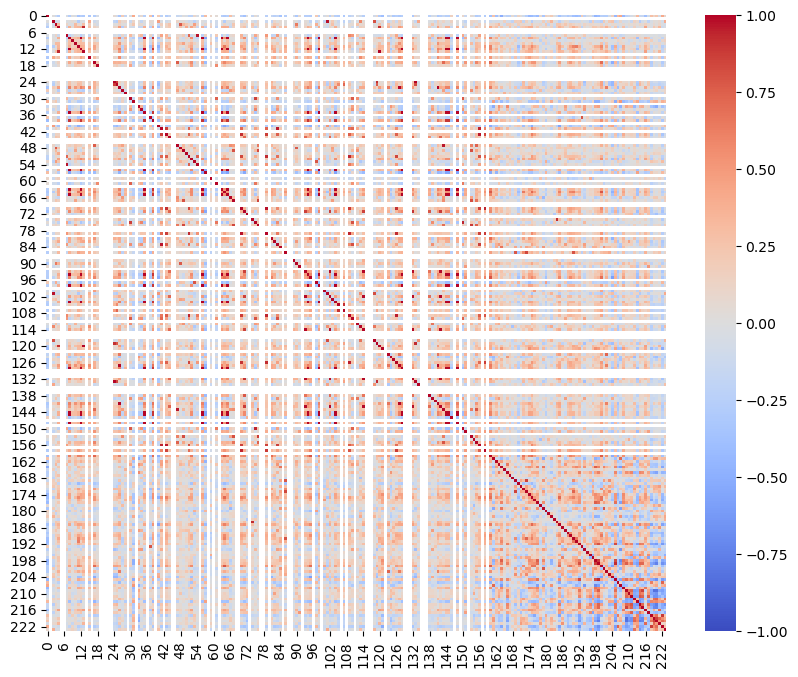

In [17]:
embed_corr = X_embed_train.corr()
print(embed_corr.shape)
plt.figure(figsize=(10,8))
sns.heatmap(embed_corr,cmap="coolwarm", vmax=1, vmin = -1)

### Columns with the same values

In fps:

Columns with all 1's represent that substructure (column) are contained in all molecules (observations) in that dataset

Columns with all 0's represent that substructure (column) are absent in all molecules (observations) in that dataset

In embed:

we also report columns (CNN embeddings) with all 0's in both train and public test data.

In [18]:
# Columns with all 1's in X_fps_train
X_fps_ratio_column = X_fps_train.mean(axis=0)
print(f'Number of substructures (columns) that present in all of the molecules (observations) in X_fps_train: {len(X_fps_ratio_column[X_fps_ratio_column == 1])}')
X_fps_ratio_column[X_fps_ratio_column == 1].index

Number of substructures (columns) that present in all of the molecules (observations) in X_fps_train: 3


Index(['356', '378', '849'], dtype='object')

In [19]:
# columns with all 0's in X_fps_train
print(f'Number of substructures (columns) that are absent in any of the molecules (observations) in X_fps_train: {len(X_fps_ratio_column[X_fps_ratio_column == 0])}')
X_fps_ratio_column[X_fps_ratio_column == 0].index

Number of substructures (columns) that are absent in any of the molecules (observations) in X_fps_train: 54


Index(['12', '18', '49', '93', '124', '132', '141', '169', '224', '229', '282',
       '290', '292', '297', '304', '321', '328', '331', '337', '340', '364',
       '368', '370', '375', '397', '450', '453', '461', '513', '533', '534',
       '541', '553', '567', '593', '596', '632', '640', '660', '740', '758',
       '763', '769', '770', '782', '789', '826', '867', '882', '913', '923',
       '957', '972', '1022'],
      dtype='object')

In [20]:
# Columns with all 1's in X_fps_public_test
X_fps_ratio_column_test = X_fps_public_test.mean(axis=0)
print(f'Number of substructures (columns) that present in all of the molecules (observations) in X_fps_public_test: {len(X_fps_ratio_column_test[X_fps_ratio_column_test == 1])}')
X_fps_ratio_column_test[X_fps_ratio_column_test == 1].index

Number of substructures (columns) that present in all of the molecules (observations) in X_fps_public_test: 4


Index(['356', '378', '831', '935'], dtype='object')

In [21]:
# Columns with all 0's in X_fps_public_test
print(f'Number of substructures (columns) that present in all of the molecules (observations) in X_fps_public_test: {len(X_fps_ratio_column_test[X_fps_ratio_column_test == 0])}')
X_fps_ratio_column_test[X_fps_ratio_column_test == 0].index

Number of substructures (columns) that present in all of the molecules (observations) in X_fps_public_test: 452


Index(['2', '6', '7', '10', '12', '17', '18', '21', '22', '29',
       ...
       '1006', '1007', '1008', '1009', '1012', '1013', '1016', '1020', '1021',
       '1023'],
      dtype='object', length=452)

In [22]:
# Columns with all 0's in both X_fps_train and X_fps_public_test
idx_fps_train_all0 = list(map(int, X_fps_ratio_column[X_fps_ratio_column == 0].index))
idx_fps_test_all0 = list(map(int, X_fps_ratio_column_test[X_fps_ratio_column_test == 0].index))
print(f'Number of substructures (columns) that are absent in all of the molecules (observations) in both fps train and fps public test: {len(sorted(list(set(idx_fps_train_all0) & set(idx_fps_test_all0))))}')
sorted(list(set(idx_fps_train_all0) & set(idx_fps_test_all0)))

Number of substructures (columns) that are absent in all of the molecules (observations) in both fps train and fps public test: 38


[12,
 18,
 49,
 93,
 132,
 169,
 229,
 290,
 292,
 304,
 321,
 328,
 331,
 340,
 364,
 368,
 370,
 375,
 397,
 450,
 453,
 513,
 533,
 541,
 567,
 593,
 660,
 740,
 758,
 763,
 769,
 782,
 826,
 867,
 882,
 913,
 957,
 972]

In [23]:
# Columns with all 1's in both X_fps_train and X_fps_public_test
idx_fps_train_all1 = list(map(int, X_fps_ratio_column[X_fps_ratio_column == 1].index))
idx_fps_test_all1 = list(map(int, X_fps_ratio_column_test[X_fps_ratio_column_test == 1].index))
print(f'Number of substructures (columns) that are absent in all of the molecules (observations) in both fps train and fps public test: {len(sorted(list(set(idx_fps_train_all1) & set(idx_fps_test_all1))))}')
sorted(list(set(idx_fps_train_all1) & set(idx_fps_test_all1)))

Number of substructures (columns) that are absent in all of the molecules (observations) in both fps train and fps public test: 2


[356, 378]

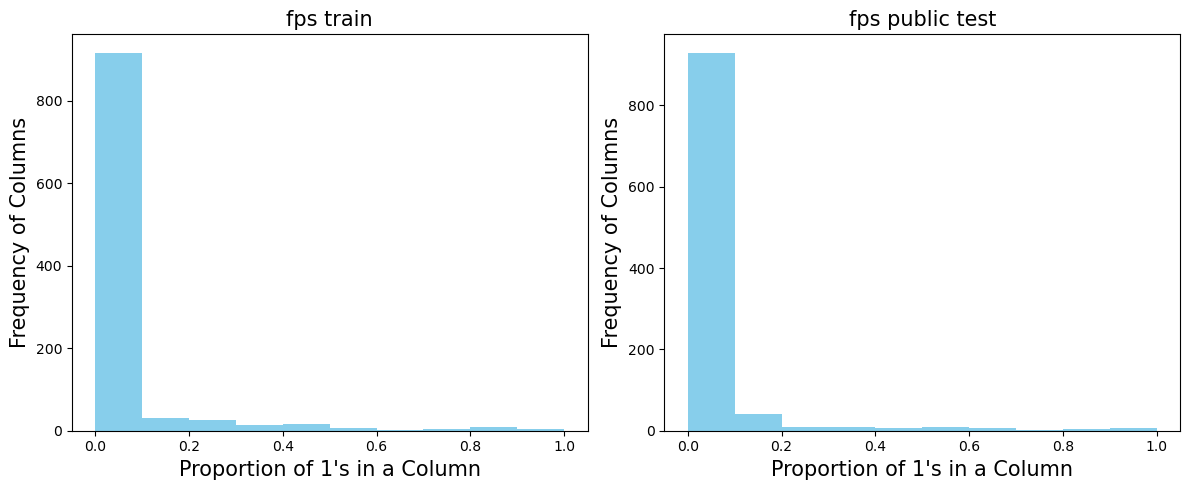

In [24]:
# Proportion of 1's in the columns of train and public test set for fps
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(X_fps_ratio_column, color="skyblue")
axes[0].set_title("fps train",fontsize=15)
axes[0].set_xlabel("Proportion of 1's in a Column",fontsize=15)
axes[0].set_ylabel("Frequency of Columns",fontsize=15)

axes[1].hist(X_fps_ratio_column_test, color="skyblue")
axes[1].set_title("fps public test",fontsize=15)
axes[1].set_xlabel("Proportion of 1's in a Column",fontsize=15)
axes[1].set_ylabel("Frequency of Columns",fontsize=15)

plt.tight_layout()
plt.show()

In [25]:
zero_columns_train = (X_embed_train ==0).all()
true_columns_train = zero_columns_train[zero_columns_train].index
zero_columns_test = (X_embed_public_test ==0).all()
true_columns_test = zero_columns_test[zero_columns_test].index
intersection = np.intersect1d(true_columns_train, true_columns_test)
print(intersection) # find the column which is zero in both X_embed_train and X_embed_public_test

['1' '106' '108' '111' '115' '116' '117' '122' '129' '130' '131' '135'
 '136' '137' '14' '147' '149' '152' '157' '159' '16' '19' '20' '21' '22'
 '23' '29' '32' '36' '39' '42' '45' '46' '5' '55' '58' '6' '60' '62' '68'
 '69' '73' '77' '78' '80' '85' '87' '88' '92' '96' '99']


## 1.2 Response

<Figure size 640x480 with 0 Axes>

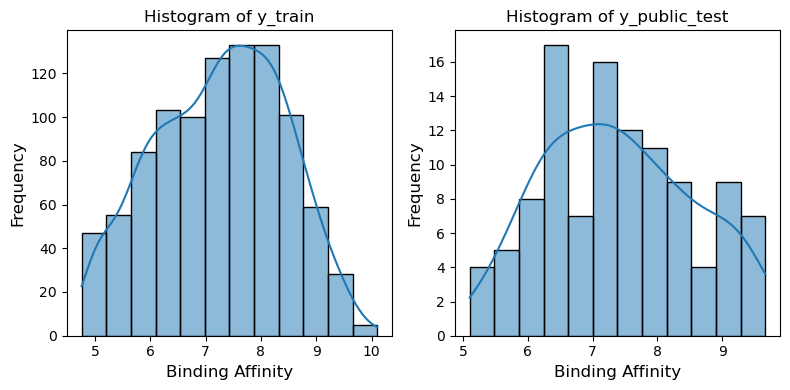

In [26]:
# histograms for y_train and y_public_test
plt.figure()
fig,axes = plt.subplots(1,2,figsize=(8,4))

sns.histplot(y_train, bins=12,kde=True, color="skyblue", ax=axes[0],legend=False)
axes[0].set_title("Histogram of y_train",fontsize=12)
axes[0].set_xlabel("Binding Affinity",fontsize=12)
axes[0].set_ylabel("Frequency",fontsize=12)


sns.histplot(y_public_test, bins=12, kde=True, color="skyblue", ax=axes[1],legend=False)
axes[1].set_title("Histogram of y_public_test",fontsize=12)
axes[1].set_xlabel("Binding Affinity",fontsize=12)
axes[1].set_ylabel("Frequency",fontsize=12)


plt.tight_layout()
# plt.savefig(vis_path + 'Figure_1.png', bbox_inches = 'tight')
plt.show()


# 2. Distribution of Training and Public Test Sets

Create the joint datasets (combining fps and embed)

In [27]:
# the combined train dataset for fps
X_fps_combined = pd.concat([X_fps_train,X_fps_public_test],axis=0)
print(X_fps_combined.shape)
X_fps_combined.head()

(1084, 1024)


,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [28]:
# the combined train data for embed 
X_embed_combined = pd.concat([X_embed_train,X_embed_public_test],axis=0)
print(X_embed_combined.shape)
X_embed_combined.head()

(1084, 224)


,0,1,2,3,4,5,6,7,8,9,...,214,215,216,217,218,219,220,221,222,223
0,0.187180,0.0,0.003742,0.196630,1.507955e-08,0.0,0.0,0.078273,0.002723,0.166424,...,0.310832,0.000000,4.432339,0.397316,1.255736,2.567172,2.585761,4.036905,1.553301,0.509254
1,0.151870,0.0,0.003540,0.265427,1.224522e-08,0.0,0.0,0.053282,0.002714,0.163829,...,1.149392,0.207148,3.972186,0.405913,0.928334,1.443732,1.522634,2.840873,1.173982,0.159537
2,0.135740,0.0,0.002932,0.234039,1.658822e-08,0.0,0.0,0.076584,0.002727,0.157557,...,0.797707,0.000000,4.703412,0.487977,0.890296,2.270626,2.155244,3.774419,0.881434,0.478385
3,0.147441,0.0,0.004043,0.259974,1.226497e-08,0.0,0.0,0.049902,0.002628,0.164079,...,1.040155,0.000000,4.092764,0.427793,0.888401,1.507603,1.459289,3.099282,0.975932,0.171279
4,0.136828,0.0,0.003005,0.251722,1.700786e-08,0.0,0.0,0.086254,0.002447,0.154827,...,0.719317,0.000000,4.751108,0.563709,1.101283,2.448888,2.190843,3.823117,1.340178,0.244902


## 2.1 t-sne dimension reduction to visualise the different distribution of train and public test data

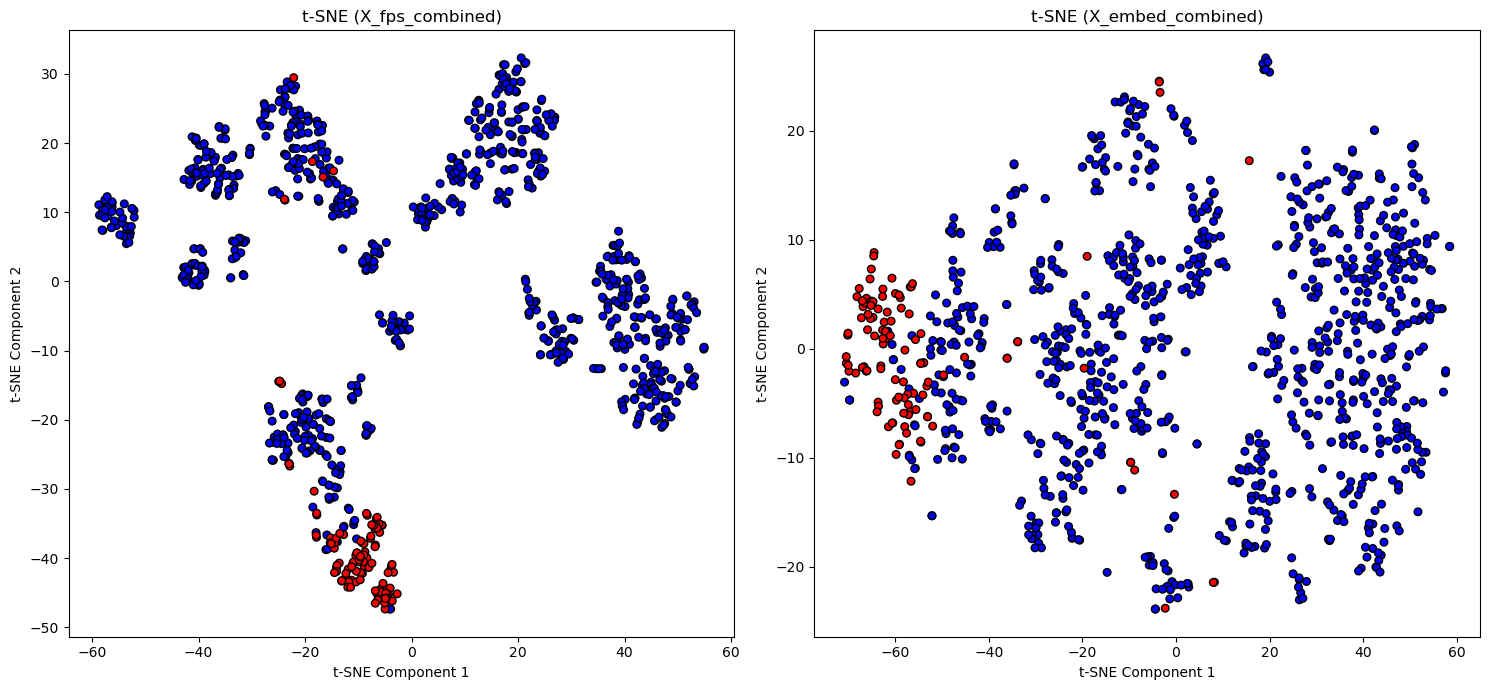

In [29]:
X_fps_combined = np.concatenate([X_fps_train, X_fps_public_test], axis=0)
dataset_labels_fps = np.concatenate([np.zeros(len(X_fps_train)), np.ones(len(X_fps_public_test))])

# t-SNE dimension reduction to 2D (X_fps)
tsne_fps = TSNE(n_components=2, perplexity=35, random_state=666)
X_tsne_fps = tsne_fps.fit_transform(X_fps_combined)

color_map_fps = {0: "blue", 1: "red"}  # Train = blue, Public Test = red
colors_fps = np.array([color_map_fps[label] for label in dataset_labels_fps])

X_embed_combined = np.concatenate([X_embed_train, X_embed_public_test], axis=0)
dataset_labels_embed = np.concatenate([np.zeros(len(X_embed_train)), np.ones(len(X_embed_public_test))])

# standardise embed data
scaler = StandardScaler()
X_embed_scaled = scaler.fit_transform(X_embed_combined)

# t-SNE dimension reduction to 2D (X_embed)
tsne_embed = TSNE(n_components=2, perplexity=35,random_state=666)
X_tsne_embed = tsne_embed.fit_transform(X_embed_scaled)

color_map_embed = {0: "blue", 1: "red"}  # Train = blue, Public Test = red
colors_embed = np.array([color_map_embed[label] for label in dataset_labels_embed])

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# fps
axs[0].scatter(
    X_tsne_fps[:, 0], 
    X_tsne_fps[:, 1], 
    c=colors_fps, 
    edgecolors="k", 
    s=30
)
axs[0].set_title('t-SNE (X_fps_combined)')
axs[0].set_xlabel('t-SNE Component 1')
axs[0].set_ylabel('t-SNE Component 2')

# embed
axs[1].scatter(
    X_tsne_embed[:, 0], 
    X_tsne_embed[:, 1], 
    c=colors_embed, 
    edgecolors="k", 
    s=30
)
axs[1].set_title('t-SNE (X_embed_combined)')
axs[1].set_xlabel('t-SNE Component 1')
axs[1].set_ylabel('t-SNE Component 2')

plt.tight_layout()
# plt.savefig(vis_path + 'Figure_5.png', bbox_inches = 'tight',dpi=500)
plt.show()

## 2.2 Construct a random forest classifier to try distinguishing between train and test set

### fps

In [30]:
# randomly sample the train data observations as the same size of the public test set
X_fps_train_109 =  X_fps_train.sample(n=109, random_state=2025)
print(X_fps_train_109.shape)

# make a copy of the public test set
X_fps_public_test_109 = X_fps_public_test.copy()

# labeling fps train data as class 0 and labeling fps public test as class 1
X_fps_train_109['class'] = 0 
X_fps_public_test_109['class'] = 1

# combine these sets together and construct a classifier to distinguish between them
X_fps_combined_109 = pd.concat([X_fps_train_109,X_fps_public_test_109],axis=0)

y = X_fps_combined_109['class']
X = X_fps_combined_109.drop(columns = ['class'])

# randomly split the train and test sets for the following random forest classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf= RandomForestClassifier(n_estimators=100, oob_score=True,random_state=66)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

print("oob score:", clf.oob_score_)
f1 = f1_score(y_test, y_pred)
print("f1 score:", f1)

(109, 1024)
oob score: 0.9597701149425287
f1 score: 0.9767441860465116


### embed

In [31]:
# similar to the processings in fps
# randomly sample the train data observations as the same size of the public test set
X_embed_train_109 =  X_embed_train.sample(n=109, random_state=45)

# make a copy of the public test set
X_embed_public_test_109 = X_embed_public_test.copy()

X_embed_train_109['class'] = 0 
X_embed_public_test_109['class'] = 1

X_embed_combined_109 = pd.concat([X_embed_train_109,X_embed_public_test_109],axis=0)

y = X_embed_combined_109['class']
X = X_embed_combined_109.drop(columns = ['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf= RandomForestClassifier(n_estimators=100, oob_score=True)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

print("oob score:", clf.oob_score_)
f1 = f1_score(y_test, y_pred)
print("f1 score:", f1)

oob score: 0.9367816091954023
f1 score: 0.9387755102040817
